Problem:-
Predict if a bank customer will default

Approach:-
-Input Data analysis

-Data Cleansing - Missing value imputation, Dummify

-Divide and separate the Target variable and the input variables.Remove the target variable from the data set.

-Train/Test Split

-Model fitting

-Model properties evaluation

-Model evaluation using cross validation

-Predict

In [1]:
#import required packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from datetime import datetime
import xgboost

Analyzing input data

In [3]:
Data_train_df = pd.read_csv("F:\\python_projects\\Credit Defaulter Prediction XGBoost\\train_indessa.csv", sep=",")
Data_test_df = pd.read_csv("F:\\python_projects\\Credit Defaulter Prediction XGBoost\\test_indessa.csv", sep=",")
print("Train data set \n----------------------------\n")
Data_train_df.info()
print("Test data set \n----------------------------\n")
Data_test_df.info()

Train data set 
----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
member_id                      532428 non-null int64
loan_amnt                      532428 non-null int64
funded_amnt                    532428 non-null int64
funded_amnt_inv                532428 non-null float64
term                           532428 non-null object
batch_enrolled                 447279 non-null object
int_rate                       532428 non-null float64
grade                          532428 non-null object
sub_grade                      532428 non-null object
emp_title                      501595 non-null object
emp_length                     505537 non-null object
home_ownership                 532428 non-null object
annual_inc                     532425 non-null float64
verification_status            532428 non-null object
pymnt_plan                     532428 non-null object
desc                           75

Basic data exploration

In [4]:
print("Train data set \n----------------------------\n")
Data_train_df.describe()


Train data set 
----------------------------



,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,...,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,...,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,...,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,...,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [5]:
print("Test data set \n----------------------------\n")
Data_test_df.describe()

Test data set 
----------------------------



,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,3.549510e+05,354951.000000,354951.000000,354951.000000,354951.000000,3.549500e+05,354951.000000,354938.000000,354938.000000,173193.000000,...,354951.000000,354951.000000,354951.000000,354951.000000,354901.00000,88723.000000,354938.000000,3.266790e+05,3.266790e+05,3.266790e+05
mean,3.499635e+07,14751.767920,14738.287116,14698.770903,13.252396,7.502420e+04,18.184447,0.314432,0.694654,34.075898,...,1756.867641,0.399299,46.221362,4.913062,0.01450,44.079923,0.004956,2.439283e+02,1.393142e+05,3.205068e+04
std,2.410120e+07,8437.019324,8431.045701,8443.341658,4.385250,6.393870e+04,25.174050,0.865533,1.000579,21.885212,...,2098.587607,4.082242,409.763865,63.128236,0.13595,22.152081,0.075333,1.613022e+04,1.535022e+05,3.664969e+04
min,7.062600e+04,500.000000,500.000000,0.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.088941e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.890000,0.000000,0.000000,15.000000,...,441.345000,0.000000,0.000000,0.000000,0.00000,27.000000,0.000000,0.000000e+00,2.987350e+04,1.390000e+04
50%,3.708650e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,...,1074.120000,0.000000,0.000000,0.000000,0.00000,44.000000,0.000000,0.000000e+00,8.036900e+04,2.370000e+04
75%,5.844892e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.940000,0.000000,1.000000,50.000000,...,2243.075000,0.000000,0.000000,0.000000,0.00000,61.000000,0.000000,0.000000e+00,2.078005e+05,3.970000e+04
max,7.354483e+07,35000.000000,35000.000000,35000.000000,28.990000,9.000000e+06,9999.000000,39.000000,33.000000,188.000000,...,23062.450000,286.747566,29282.070000,5569.920000,20.00000,188.000000,5.000000,9.152545e+06,4.447397e+06,9.999999e+06


Data Cleansing steps: Strip off textual parts,Convert datatype to numeric, etc


In [6]:
Data_train_df['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
Data_test_df['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
Data_train_df['term'] = pd.to_numeric(Data_train_df['term'], errors='coerce')
Data_test_df['term'] = pd.to_numeric(Data_test_df['term'], errors='coerce')
Data_train_df['emp_length'].replace('n/a', '0', inplace=True)
Data_train_df['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
Data_train_df['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
Data_train_df['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
Data_train_df['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
Data_test_df['emp_length'].replace('n/a', '0', inplace=True)
Data_test_df['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
Data_test_df['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
Data_test_df['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
Data_test_df['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
Data_train_df['emp_length'] = pd.to_numeric(Data_train_df['emp_length'], errors='coerce')
Data_test_df['emp_length'] = pd.to_numeric(Data_test_df['emp_length'], errors='coerce')
Data_train_df['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
Data_test_df['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
Data_train_df['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
Data_test_df['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
Data_train_df['last_week_pay'] = pd.to_numeric(Data_train_df['last_week_pay'], errors='coerce')
Data_test_df['last_week_pay'] = pd.to_numeric(Data_test_df['last_week_pay'], errors='coerce')
Data_train_df['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
Data_train_df['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
Data_train_df['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
Data_train_df['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
Data_train_df['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
Data_train_df['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
Data_train_df['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
Data_test_df['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
Data_test_df['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
Data_test_df['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
Data_test_df['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
Data_test_df['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
Data_test_df['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
Data_test_df['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
Data_train_df['sub_grade'] = pd.to_numeric(Data_train_df['sub_grade'], errors='coerce')
Data_test_df['sub_grade'] = pd.to_numeric(Data_test_df['sub_grade'], errors='coerce')

Missing values imputation with median & zero

In [7]:
cols = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
print('Imputation with Median:' )
for col in cols:
    print("\n",col)
    Data_train_df[col].fillna(Data_train_df[col].median(), inplace=True)
    Data_test_df[col].fillna(Data_test_df[col].median(), inplace=True)

print("\n\nImputation with Zero:")
cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in cols:
    print("\n",col)
    Data_train_df[col].fillna(0, inplace=True)
    Data_test_df[col].fillna(0, inplace=True)



Imputation with Median:

 term

 loan_amnt

 funded_amnt

 last_week_pay

 int_rate

 sub_grade

 annual_inc

 dti

 mths_since_last_delinq

 mths_since_last_record

 open_acc

 revol_bal

 revol_util

 total_acc

 total_rec_int

 mths_since_last_major_derog

 tot_coll_amt

 tot_cur_bal

 total_rev_hi_lim

 emp_length


Imputation with Zero:

 acc_now_delinq

 total_rec_late_fee

 recoveries

 collection_recovery_fee

 collections_12_mths_ex_med


Feature Engineering

In [8]:
# Separate the member_id column of test dataframe
test_member_id = pd.DataFrame(Data_test_df['member_id'])

# Create target variable in pandas series from train dataframeto be used in cross validation for calculating accuracy of the model
train_target = pd.DataFrame(Data_train_df['loan_status'])

# create a copy of train and test dataframes.
cols_selected = ['member_id', 'emp_length', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'mths_since_last_major_derog', 'last_week_pay', 'tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt', 'recoveries', 'collection_recovery_fee', 'term', 'acc_now_delinq', 'collections_12_mths_ex_med']
final_Train_Set = Data_train_df[cols_selected]
final_Test_Set = Data_test_df[cols_selected]

# Loan Amount relationship with earnings, annual income to loan amount ratio
final_Train_Set['loan_to_income'] = final_Train_Set['annual_inc']/final_Train_Set['funded_amnt_inv']
final_Test_Set['loan_to_income'] = final_Test_Set['annual_inc']/final_Test_Set['funded_amnt_inv']

# NPA Loan
final_Train_Set['bad_state'] = final_Train_Set['acc_now_delinq'] + (final_Train_Set['total_rec_late_fee']/final_Train_Set['funded_amnt_inv']) + (final_Train_Set['recoveries']/final_Train_Set['funded_amnt_inv']) + (final_Train_Set['collection_recovery_fee']/final_Train_Set['funded_amnt_inv']) + (final_Train_Set['collections_12_mths_ex_med']/final_Train_Set['funded_amnt_inv'])
final_Test_Set['bad_state'] = final_Test_Set['acc_now_delinq'] + (final_Test_Set['total_rec_late_fee']/final_Test_Set['funded_amnt_inv']) + (final_Test_Set['recoveries']/final_Test_Set['funded_amnt_inv']) + (final_Test_Set['collection_recovery_fee']/final_Test_Set['funded_amnt_inv']) + (final_Train_Set['collections_12_mths_ex_med']/final_Test_Set['funded_amnt_inv'])

# Total number of available/unused 'credit lines'
final_Train_Set['avl_lines'] = final_Train_Set['total_acc'] - final_Train_Set['open_acc']
final_Test_Set['avl_lines'] = final_Test_Set['total_acc'] - final_Test_Set['open_acc']

# Interest paid so far
final_Train_Set['int_paid'] = final_Train_Set['total_rec_int'] + final_Train_Set['total_rec_late_fee']
final_Test_Set['int_paid'] = final_Test_Set['total_rec_int'] + final_Test_Set['total_rec_late_fee']

# EMIs paid in percentage
final_Train_Set['emi_paid_progress_perc'] = ((final_Train_Set['last_week_pay']/(final_Train_Set['term']/12*52+1))*100)
final_Test_Set['emi_paid_progress_perc'] = ((final_Test_Set['last_week_pay']/(final_Test_Set['term']/12*52+1))*100)

# Total repayments received in terms of EMI or recoveries after charge off
final_Train_Set['total_repayment_progress'] = ((final_Train_Set['last_week_pay']/(final_Train_Set['term']/12*52+1))*100) + ((final_Train_Set['recoveries']/final_Train_Set['funded_amnt_inv']) * 100)
final_Test_Set['total_repayment_progress'] = ((final_Test_Set['last_week_pay']/(final_Test_Set['term']/12*52+1))*100) + ((final_Test_Set['recoveries']/final_Test_Set['funded_amnt_inv']) * 100)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

Train/Test/CV Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(np.array(final_Train_Set), np.array(train_target), test_size=0.30)
eval_set=[(X_test, y_test)]

Initialize XGBoost & train model

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[0]	validation_0-auc:0.968099
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.969134
[2]	validation_0-auc:0.969515
[3]	validation_0-auc:0.970072
[4]	validation_0-auc:0.970783
[5]	validation_0-auc:0.971083
[6]	validation_0-auc:0.971237
[7]	validation_0-auc:0.971451
[8]	validation_0-auc:0.97161
[9]	validation_0-auc:0.971748
[10]	validation_0-auc:0.972162
[11]	validation_0-auc:0.972217
[12]	validation_0-auc:0.972401
[13]	validation_0-auc:0.972486
[14]	validation_0-auc:0.972582
[15]	validation_0-auc:0.972668
[16]	validation_0-auc:0.972825
[17]	validation_0-auc:0.972853
[18]	validation_0-auc:0.97292
[19]	validation_0-auc:0.972988
[20]	validation_0-auc:0.973043
[21]	validation_0-auc:0.973095
[22]	validation_0-auc:0.97316
[23]	validation_0-auc:0.973184
[24]	validation_0-auc:0.97321
[25]	validation_0-auc:0.973228
[26]	validation_0-auc:0.973261
[27]	validation_0-auc:0.973371
[28]	validation_0-auc:0.973408
[29]	validation_0-auc:0.973464
[30]	validation_0-au

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


[1.9116077e-01 1.7397193e-02 2.0001562e-02 1.6667969e-03 1.0521655e-02
 3.5653826e-02 4.4612862e-02 4.2242885e-02 5.9431728e-02 2.0366175e-02
 1.1823840e-02 1.9871345e-02 3.9273903e-02 4.6566136e-02 1.6589837e-02
 5.1905096e-02 8.6465087e-03 1.0104956e-02 1.3037477e-01 5.2191578e-02
 3.4403730e-02 9.2715574e-03 8.2037663e-03 0.0000000e+00 1.1120660e-02
 4.4274292e-04 1.8230591e-04 4.5029558e-02 1.2292627e-02 2.7658410e-02
 4.3232543e-03 1.1459229e-02 5.2087405e-03]
0 member_id
1 emp_length
2 loan_amnt
3 funded_amnt
4 funded_amnt_inv
5 sub_grade
6 int_rate
7 annual_inc
8 dti
9 mths_since_last_delinq
10 mths_since_last_record
11 open_acc
12 revol_bal
13 revol_util
14 total_acc
15 total_rec_int
16 total_rec_late_fee
17 mths_since_last_major_derog
18 last_week_pay
19 tot_cur_bal
20 total_rev_hi_lim
21 tot_coll_amt
22 recoveries
23 collection_recovery_fee
24 term
25 acc_now_delinq
26 collections_12_mths_ex_med
27 loan_to_income
28 bad_state
29 avl_lines
30 int_paid
31 emi_paid_progress_perc

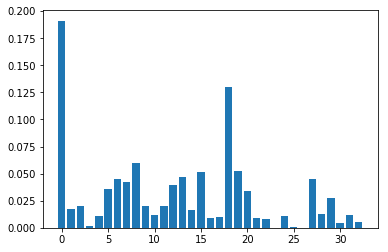

In [11]:
st = datetime.now()

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

print(datetime.now()-st)

y_pred = clf.predict(X_test)
submission_file_name = 'Submission_'

accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("_Accuracy_%.6f" % (accuracy * 100)) + '_'

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC-AUC_%.6f" % (accuracy_per_roc_auc * 100))

final_pred = pd.DataFrame(clf.predict_proba(np.array(final_Test_Set)))
dfSub = pd.concat([test_member_id, final_pred.ix[:, 1:2]], axis=1)
dfSub.rename(columns={1:'loan_status'}, inplace=True)
dfSub.to_csv((('%s.csv') % (submission_file_name)), index=False)

import matplotlib.pyplot as plt
print(clf.feature_importances_)
idx = 0
for x in list(final_Train_Set):
    print('%d %s' % (idx, x))
    idx = idx + 1
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()